# ObsID : 0945020137, SRCNUM : 21, Instru : EPN
Not on Simbad

In [ ]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

## Load files
Spectrum, Background, Response, Auxiliary response.

In [7]:
Spectrum(glob.glob("ObsID*SRCNUM*E*spectrum_grp.fits")[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.083e-02 +/- 1.462e-03 (36.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-14
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.622e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020137_SRCNUM21_EPN_background_spectrum.fits
  Background Exposure Time: 1.619e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EPN.arf



## Plot spectrum

In [8]:
Plot.xAxis="keV"
#Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 861.5, 664.5, -0.5)

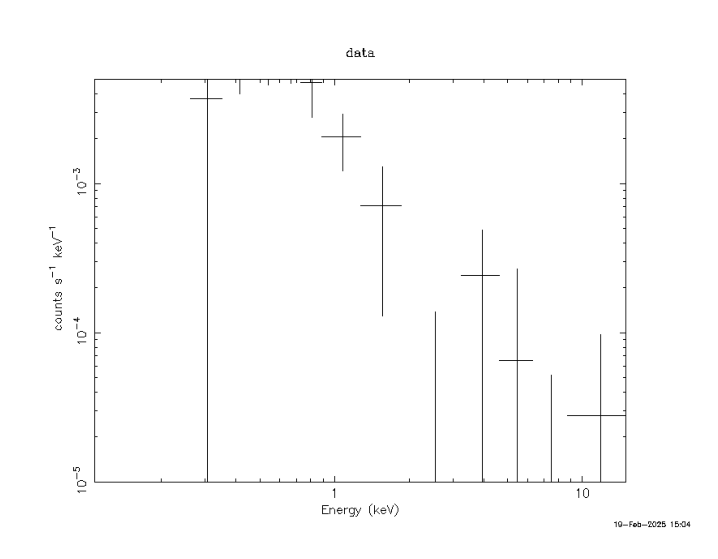

In [9]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [10]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.189737e+12     using 14 bins.

Te

(-0.5, 861.5, 662.5, -0.5)

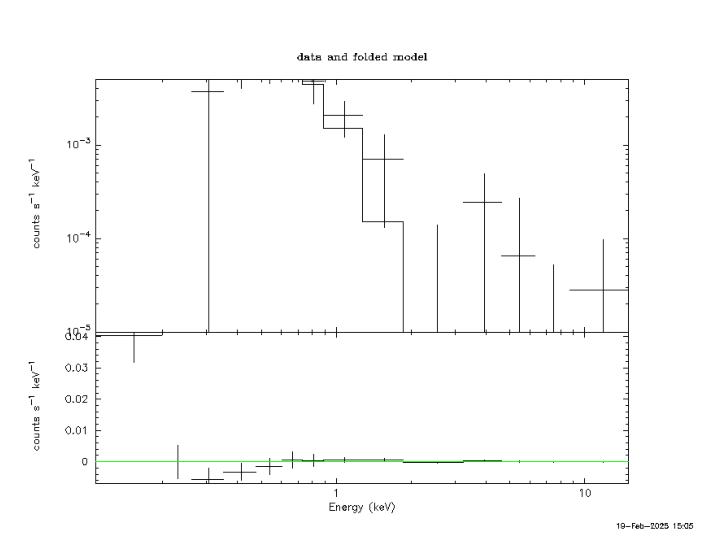

In [12]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [13]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.680161e+11     using 14 bins.

Test statistic : Chi-Squared              1.680161e+11     using 14 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
77.921       0.380391      0      0.342963       2.91989   2.45589e-06
69.2359      266953        0     0.0419320      0.726211   2.73785e-06
46.2366      779399       -1    0.00977429       1.26174   4.93585e-06


(-0.5, 861.5, 662.5, -0.5)

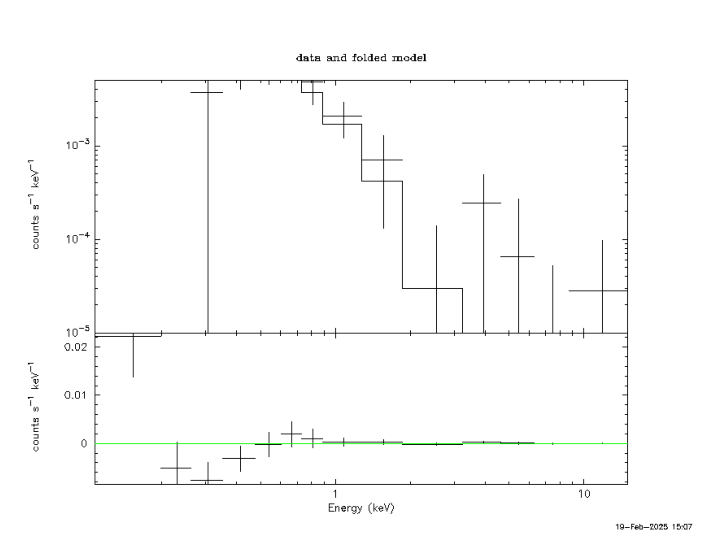

In [14]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [15]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              3.471245e+10     using 14 bins.

Test statistic : Chi-Squared              3.471245e+10     using 14 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
74.4977      1.99023       0      0.984991      0.885756   

(-0.5, 862.5, 664.5, -0.5)

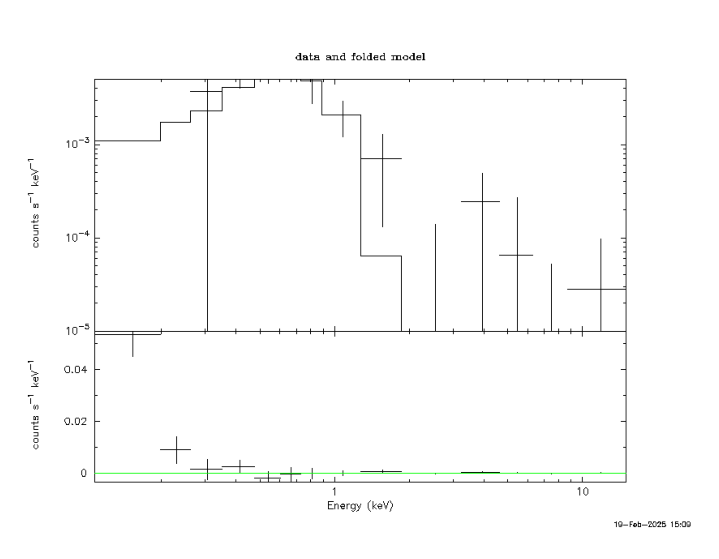

In [16]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [17]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
#Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.825983e+11     using 14 bins.

Test statistic : Chi-Squared              9.825983e+11     using 14 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
82.2329      0.250621     -1      0.177427      0.928769   1.78282e-07
76.8007      1.01871e+06   0     0.0348636       2.16521   4.26736e-07
17.0443      2.46313e+06  -1   0.000689700       3.15677   2.15913e-0

(-0.5, 859.5, 662.5, -0.5)

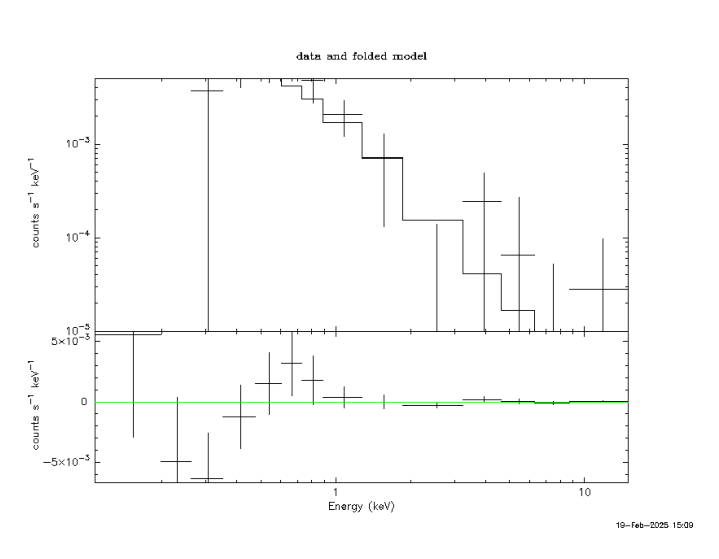

In [18]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [19]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.6053e-05 photons (1.9759e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [20]:
Flux = 1.9759e-14 # ergs/cm^2/s

### ESASky
Aucune distance  n'est diponible sur ESASky. https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"